<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/assignment/ass7/hpdp/DEADPOOL/Assignment7_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 7: Comparison between libraries

[![](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drshahizan/Python_EDA/blob/ef2db3544a9df7111d9209dac788aa6f8fbe4a77/assignment/ass4/hpdp/3H/feature_eng.ipynb)


### Group Members

**Group Name:** DEADPOOL

| Name                                     | Matrix Number  
| :---------------------------------------- | :-------------: |
| UMAR HAZIQ BIN MOHAMAD NORHISHAM | A21E0235
|MUHAMMAD AMIR JAMIL BIN JAMLUS          | A21EC0202     |
|KEE SHIN PEARL         | A21EC0190     |
|MUHAMMAD IZZUDDIN BIN SHABRIN           | A21EC0083   |















#Pick a Big Dataset:

---



## About the Data
The dataset comprises information sourced from three
distinct CSV files, totaling over 70 million records with 44 columns and a data size exceeding 8.0GB. Separating these files allows for systematic feature engineering without risking system crashes during the process.

LINK: [Anime Dataset 2023](https://www.kaggle.com/datasets/dbdmobile/myanimelist-dataset)


Anime is a popular form of entertainment originating from Japan. It encompasses a wide range of animated TV series, movies, and OVAs (original video animations) that cater to various genres and target audiences. Anime is known for its distinctive art style, compelling storytelling, and diverse themes.

Anime covers a vast array of genres, including action, adventure, comedy, drama, romance, fantasy, sci-fi, and many more. Each genre offers unique storytelling elements and appeals to different preferences and interests among anime enthusiasts. It has gained significant popularity worldwide and has developed a dedicated and passionate fanbase. Fans of anime often engage in discussions, reviews, and rankings, contributing to the vibrant community surrounding this form of entertainment.

Due to the vast number of anime titles available, recommendations play a crucial role in helping enthusiasts discover new shows that align with their interests. Recommendation systems leverage user ratings, genres, and other factors to suggest anime series that users might enjoy based on their preferences.

#Instructions:


---



Step 1: Select a real-world dataset

Step 2: Perform data preparation & cleaning

Step 3: Perform exploratory analysis & visualization

Step 4: Ask & answer questions about the data

Step 5: Summarize your inferences & write a conclusion





#Downloading the Dataset

---



### <span style="color:Brown; font-family:Arial;">Importing Libraries</span>


 1.Firstly, we upload the file into this notebook.This function is used for uploading files from your local machine to your Colab notebook.





In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"marsssziq","key":"c97c49ad9207fbd152efaf1af0ceebe5"}'}

2.We used Kaggle API to download the dataset with the specified dataset ID.

In [ ]:
# Create a kaggle folder
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d dbdmobile/myanimelist-dataset

 99% 1.78G/1.80G [00:21<00:00, 119MB/s]
100% 1.80G/1.80G [00:21<00:00, 88.3MB/s]


3.The "!" signifies that it's a shell command, and the command-line tool unzip is used to extract files from zip archives. The contents of the zip file are extracted and placed in the current directory. You can use the extracted files and data in Google Colab after executing this command.

In [ ]:
! unzip myanimelist-dataset.zip

Archive:  myanimelist-dataset.zip
  inflating: anime-dataset-2023.csv  
  inflating: anime-filtered.csv      
  inflating: final_animedataset.csv  
  inflating: user-filtered.csv       
  inflating: users-details-2023.csv  
  inflating: users-score-2023.csv    


4. Next, we import the necessaries libraries into this notebook.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

##Data Preparation & Cleaning



*   Load the dataset
*   Explore the number of rows & columns, ranges of values etc.
*   Handle missing, incorrect and invalid data
*   Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)





In [ ]:
df = pd.read_csv('users-score-2023.csv')

#display the first few rows of DataFrame
print(df.head())


   user_id Username  anime_id             Anime Title  rating
0        1    Xinil        21               One Piece       9
1        1    Xinil        48             .hack//Sign       7
2        1    Xinil       320                  A Kite       5
3        1    Xinil        49        Aa! Megami-sama!       8
4        1    Xinil       304  Aa! Megami-sama! Movie       8


Summary Statistics

In [ ]:
print(df.describe())

            user_id      anime_id        rating
count  2.432519e+07  2.432519e+07  2.432519e+07
mean   4.403843e+05  9.754686e+03  7.622930e+00
std    3.669469e+05  1.206196e+04  1.661510e+00
min    1.000000e+00  1.000000e+00  1.000000e+00
25%    9.718800e+04  8.730000e+02  7.000000e+00
50%    3.879780e+05  4.726000e+03  8.000000e+00
75%    5.280430e+05  1.316100e+04  9.000000e+00
max    1.291097e+06  5.608500e+04  1.000000e+01


DataFrame Info

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24325191 entries, 0 to 24325190
Data columns (total 5 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      int64 
 1   Username     object
 2   anime_id     int64 
 3   Anime Title  object
 4   rating       int64 
dtypes: int64(3), object(2)
memory usage: 927.9+ MB
None


Missing values

In [ ]:
print(df.isnull().sum())

user_id        0
Username       0
anime_id       0
Anime Title    0
rating         0
dtype: int64


Removing Duplicates

In [ ]:
df.drop_duplicates(inplace=True)
print (df)

          user_id    Username  anime_id             Anime Title  rating
0               1       Xinil        21               One Piece       9
1               1       Xinil        48             .hack//Sign       7
2               1       Xinil       320                  A Kite       5
3               1       Xinil        49        Aa! Megami-sama!       8
4               1       Xinil       304  Aa! Megami-sama! Movie       8
...           ...         ...       ...                     ...     ...
24325186  1291087   Oblongata     10611                    R-15       3
24325187  1291087   Oblongata       174            Tenjou Tenge       6
24325188  1291097  JuunanaSai      1535              Death Note       9
24325189  1291097  JuunanaSai       226              Elfen Lied      10
24325190  1291097  JuunanaSai      8425                  Gosick      10

[24325191 rows x 5 columns]


##2. Exploratory Data Analysis (EDA) & Visualisation



*   Compute the mean, sum, range and other interesting statistics for numeric columns
*   Explore distributions of numeric columns using histograms etc.
*   Explore relationship between columns using scatter plots, bar charts etc.
*   Make a note of interesting insights from the exploratory analysis




 Distribution of ratings

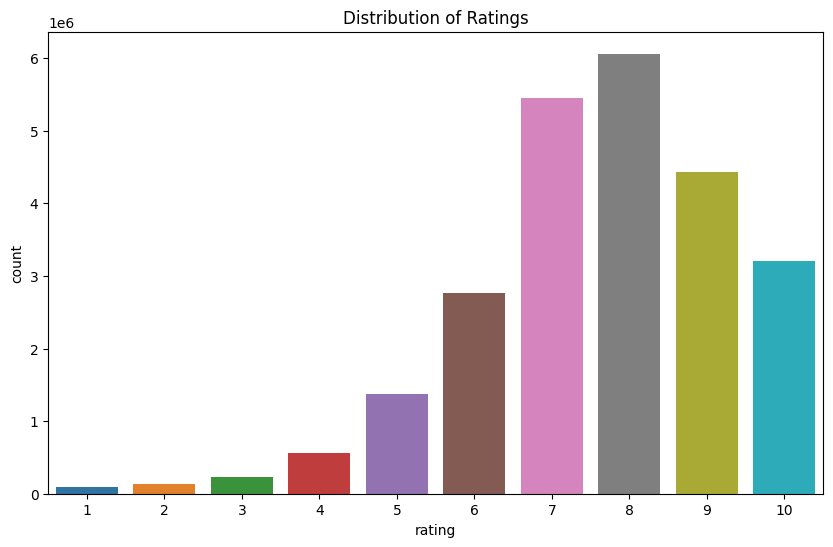

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df)
plt.title('Distribution of Ratings')
plt.show()

Top-rated anime titles

In [ ]:
top_rated_anime = df.groupby('Anime Title')['rating'].mean().sort_values(ascending=False).head(10)
print('Top 10 Rated Anime Titles:')
print(top_rated_anime)

Top 10 Rated Anime Titles:
Anime Title
Trick with Treat!! (with Undead)                  10.0
Teikou Penguin                                    10.0
Hakata Bus Terminal Blues                         10.0
Sore Ike! Anpanman: Yuurei Sen wo Yattsukero!!    10.0
Neko Naraba Ikeru                                 10.0
Hanabi (2022)                                     10.0
Deko Boko Friends                                 10.0
Sore Ike! Anpanman: Kirakira Boshi no Namida      10.0
Jungle Kurobee                                    10.0
Negative Shinkaron feat. Hatsune Miku             10.0
Name: rating, dtype: float64


Number of ratings per user

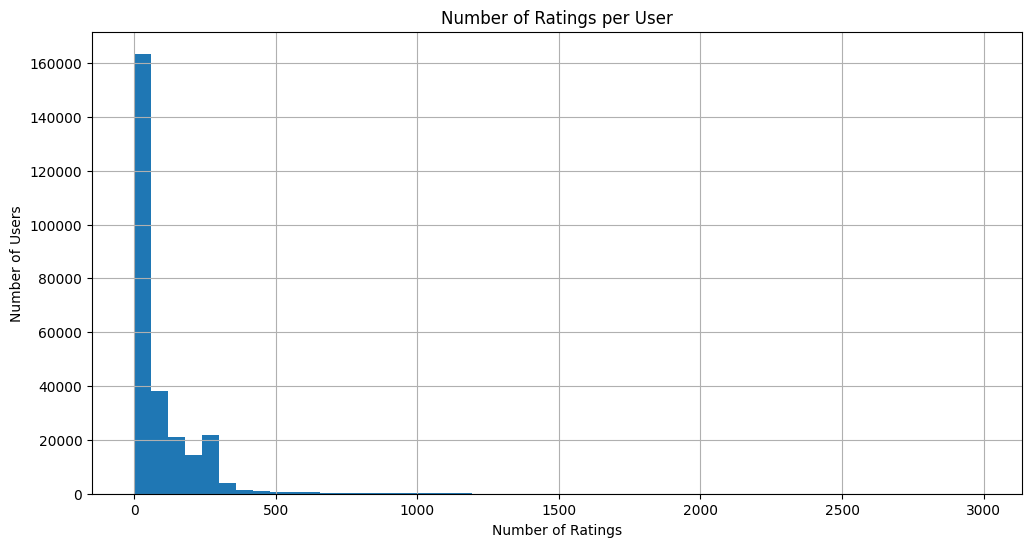

In [ ]:
ratings_per_user = df.groupby('user_id')['rating'].count().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
ratings_per_user.hist(bins=50)
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.show()

Distribution of Ratings by Anime

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65291 (\N{FULLWIDTH PLUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65343 (\N{FULLWIDTH LOW LINE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65290 (\N{FULLWIDTH ASTERISK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65306 (\N{FULLWIDTH COLON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10548 (\N{ARROW POINTING RIGHTWARDS THEN CURVING UPWARDS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/pyth

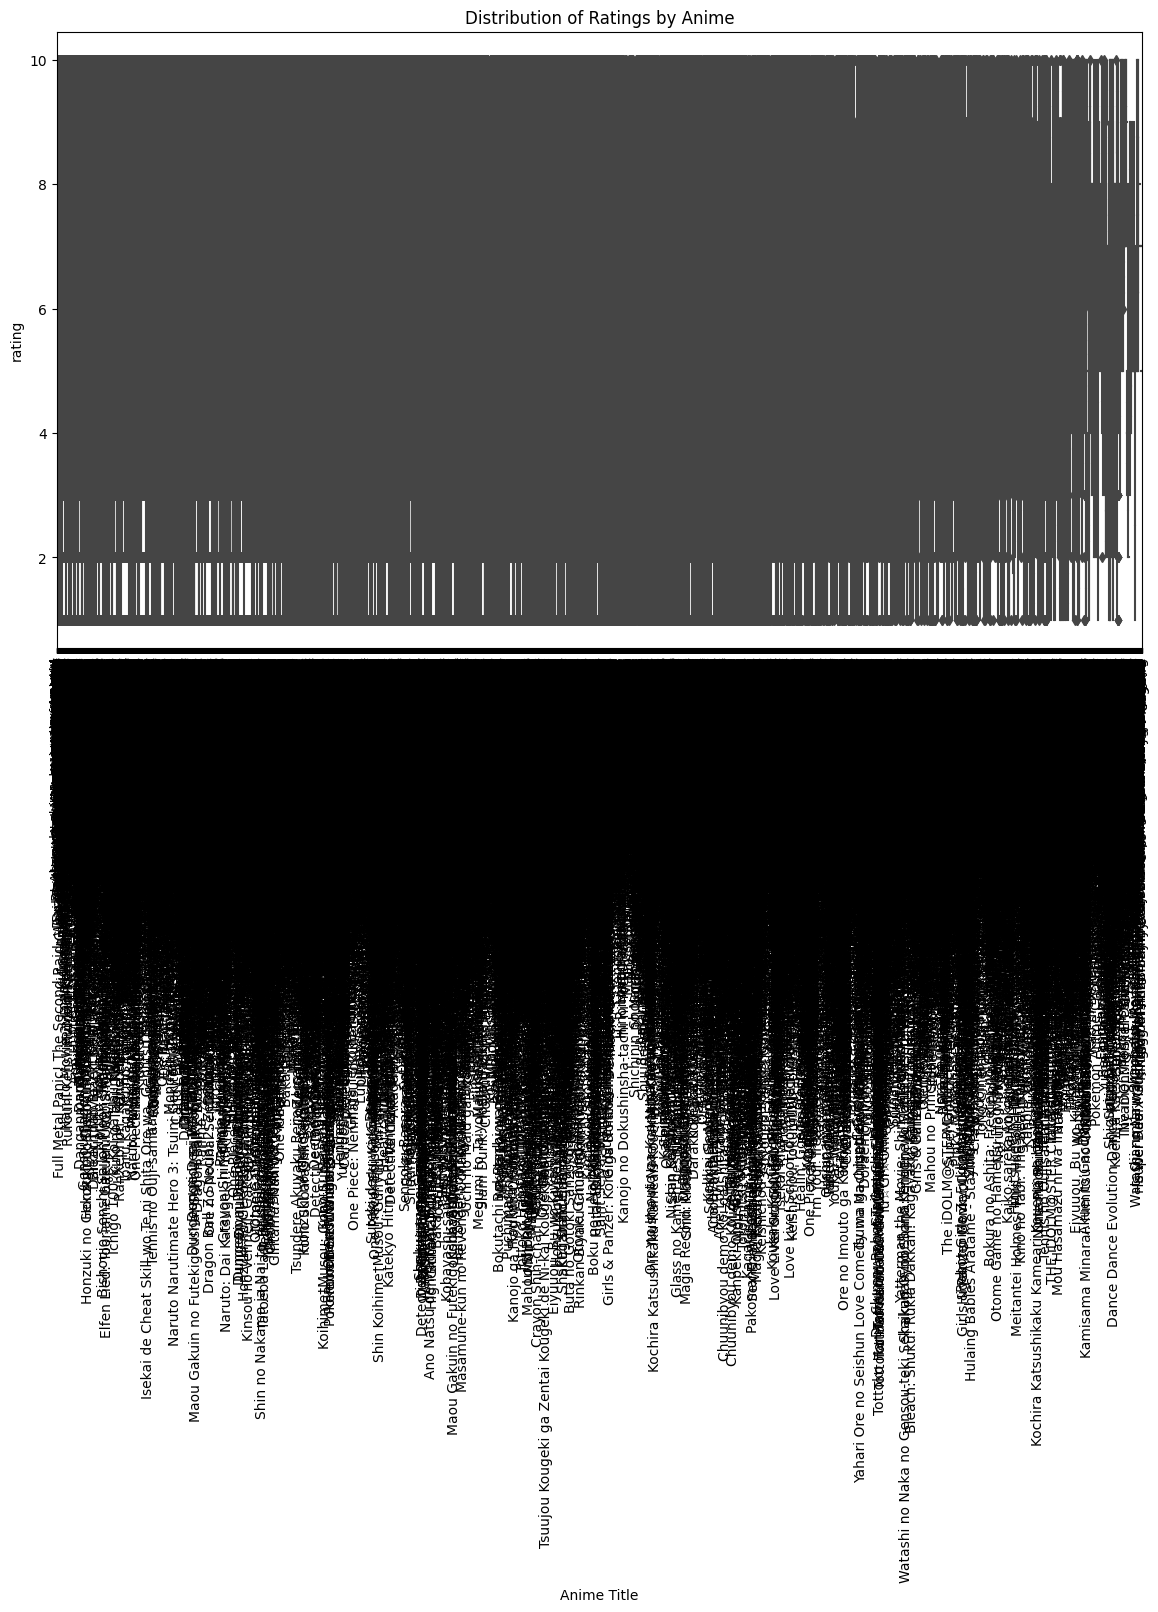

In [ ]:

plt.figure(figsize=(14, 8))
sns.boxplot(x='Anime Title', y='rating', data=df)
plt.title('Distribution of Ratings by Anime')
plt.xticks(rotation=90)
plt.show()


User Engagement

In [ ]:
unique_users = df['user_id'].nunique()
unique_anime = df['anime_id'].nunique()
print(f'Number of Unique Users: {unique_users}')
print(f'Number of Unique Anime: {unique_anime}')

Number of Unique Users: 270033
Number of Unique Anime: 16500


Rating Distribution per User:

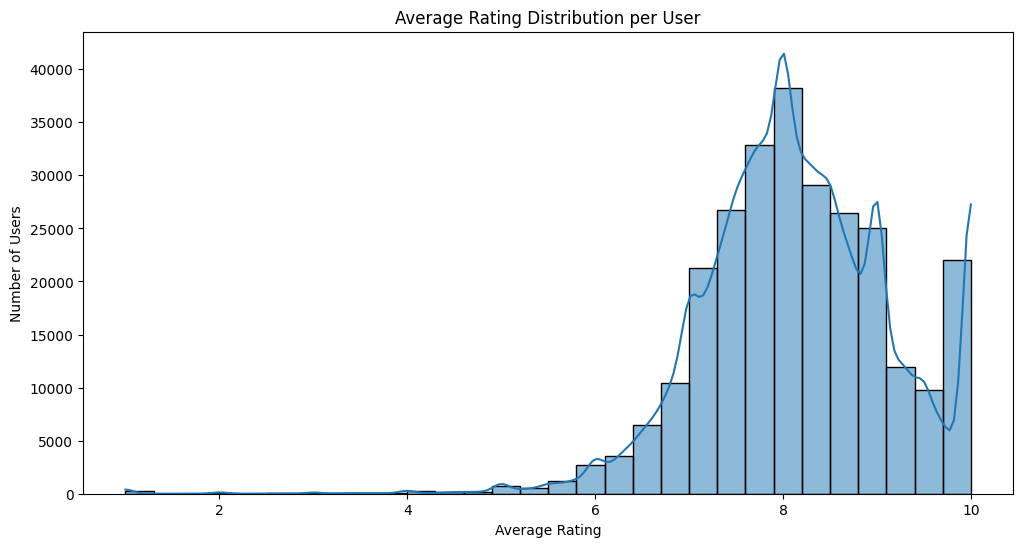

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df.groupby('user_id')['rating'].mean(), bins=30, kde=True)
plt.title('Average Rating Distribution per User')
plt.xlabel('Average Rating')
plt.ylabel('Number of Users')
plt.show()

Relationship between Features

<ipython-input-22-1c9ab57d4197>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


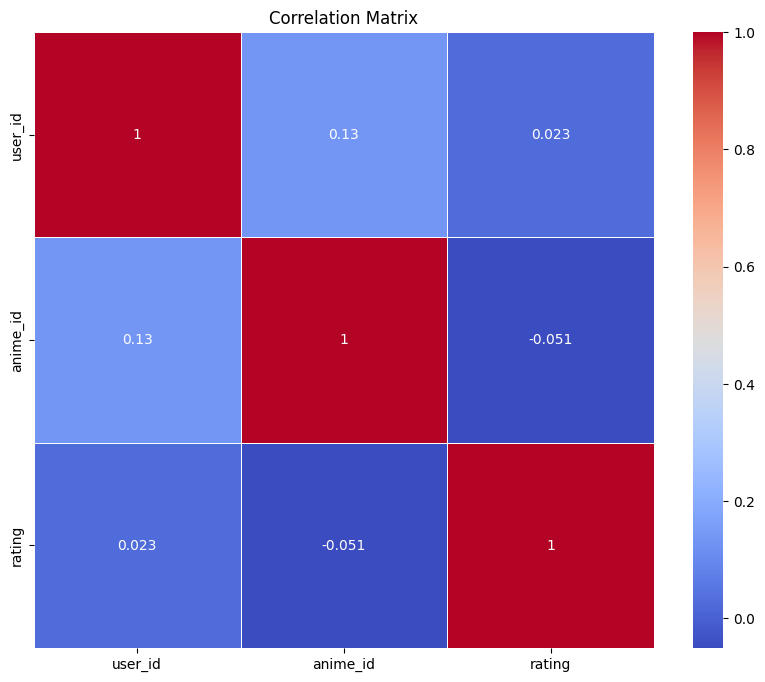

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

Anime Titles with Most Ratings

In [ ]:
most_rated_anime = df.groupby('Anime Title')['rating'].count().sort_values(ascending=False).head(10)
print('Top 10 Most Rated Anime Titles:')
print(most_rated_anime)

Top 10 Most Rated Anime Titles:
Anime Title
Death Note                            126492
Code Geass: Hangyaku no Lelouch        96950
Fullmetal Alchemist                    93001
Bleach                                 90132
Naruto                                 89579
Elfen Lied                             87107
Code Geass: Hangyaku no Lelouch R2     82329
Fullmetal Alchemist: Brotherhood       76710
Angel Beats!                           70360
Sen to Chihiro no Kamikakushi          68880
Name: rating, dtype: int64


## Feature Engineering

Create a Feature for Average User Rating

In [ ]:
# Calculate average rating per user
df['avg_user_rating'] = df.groupby('user_id')['rating'].transform('mean')
print(df)

          user_id    Username  anime_id             Anime Title  rating  \
0               1       Xinil        21               One Piece       9   
1               1       Xinil        48             .hack//Sign       7   
2               1       Xinil       320                  A Kite       5   
3               1       Xinil        49        Aa! Megami-sama!       8   
4               1       Xinil       304  Aa! Megami-sama! Movie       8   
...           ...         ...       ...                     ...     ...   
24325186  1291087   Oblongata     10611                    R-15       3   
24325187  1291087   Oblongata       174            Tenjou Tenge       6   
24325188  1291097  JuunanaSai      1535              Death Note       9   
24325189  1291097  JuunanaSai       226              Elfen Lied      10   
24325190  1291097  JuunanaSai      8425                  Gosick      10   

          avg_user_rating  
0                7.438931  
1                7.438931  
2              

Create a Feature for Average Anime Rating

In [ ]:
# Calculate average rating per anime
df['avg_anime_rating'] = df.groupby('anime_id')['rating'].transform('mean')
print(df)

          user_id    Username  anime_id             Anime Title  rating  \
0               1       Xinil        21               One Piece       9   
1               1       Xinil        48             .hack//Sign       7   
2               1       Xinil       320                  A Kite       5   
3               1       Xinil        49        Aa! Megami-sama!       8   
4               1       Xinil       304  Aa! Megami-sama! Movie       8   
...           ...         ...       ...                     ...     ...   
24325186  1291087   Oblongata     10611                    R-15       3   
24325187  1291087   Oblongata       174            Tenjou Tenge       6   
24325188  1291097  JuunanaSai      1535              Death Note       9   
24325189  1291097  JuunanaSai       226              Elfen Lied      10   
24325190  1291097  JuunanaSai      8425                  Gosick      10   

          avg_user_rating  rating_deviation_user rating_category  \
0                7.438931      

Create a Feature for Number of Ratings per Anime:

In [ ]:
df['num_ratings_anime'] = df.groupby('anime_id')['rating'].transform('count')
print(df)

          user_id    Username  anime_id             Anime Title  rating  \
0               1       Xinil        21               One Piece       9   
1               1       Xinil        48             .hack//Sign       7   
2               1       Xinil       320                  A Kite       5   
3               1       Xinil        49        Aa! Megami-sama!       8   
4               1       Xinil       304  Aa! Megami-sama! Movie       8   
...           ...         ...       ...                     ...     ...   
24325186  1291087   Oblongata     10611                    R-15       3   
24325187  1291087   Oblongata       174            Tenjou Tenge       6   
24325188  1291097  JuunanaSai      1535              Death Note       9   
24325189  1291097  JuunanaSai       226              Elfen Lied      10   
24325190  1291097  JuunanaSai      8425                  Gosick      10   

          avg_user_rating  rating_deviation_user rating_category  \
0                7.438931      

Create a Feature for Rating Deviation from User Average

In [ ]:
df['rating_deviation_user'] = df['rating'] - df['avg_user_rating']
print(df)

          user_id    Username  anime_id             Anime Title  rating  \
0               1       Xinil        21               One Piece       9   
1               1       Xinil        48             .hack//Sign       7   
2               1       Xinil       320                  A Kite       5   
3               1       Xinil        49        Aa! Megami-sama!       8   
4               1       Xinil       304  Aa! Megami-sama! Movie       8   
...           ...         ...       ...                     ...     ...   
24325186  1291087   Oblongata     10611                    R-15       3   
24325187  1291087   Oblongata       174            Tenjou Tenge       6   
24325188  1291097  JuunanaSai      1535              Death Note       9   
24325189  1291097  JuunanaSai       226              Elfen Lied      10   
24325190  1291097  JuunanaSai      8425                  Gosick      10   

          avg_user_rating  rating_deviation_user rating_category  \
0                7.438931      

Create a Feature for Rating Deviation from Anime Average

In [ ]:
# Calculate the deviation of each rating from the average rating of the corresponding anime
df['rating_deviation_anime'] = df['rating'] - df['avg_anime_rating']
print(df)


          user_id    Username  anime_id             Anime Title  rating  \
0               1       Xinil        21               One Piece       9   
1               1       Xinil        48             .hack//Sign       7   
2               1       Xinil       320                  A Kite       5   
3               1       Xinil        49        Aa! Megami-sama!       8   
4               1       Xinil       304  Aa! Megami-sama! Movie       8   
...           ...         ...       ...                     ...     ...   
24325186  1291087   Oblongata     10611                    R-15       3   
24325187  1291087   Oblongata       174            Tenjou Tenge       6   
24325188  1291097  JuunanaSai      1535              Death Note       9   
24325189  1291097  JuunanaSai       226              Elfen Lied      10   
24325190  1291097  JuunanaSai      8425                  Gosick      10   

          avg_user_rating  rating_deviation_user rating_category  \
0                7.438931      

Binning of Ratings:

In [ ]:
bins = [0, 4, 7, 10]
labels = ['Low', 'Medium', 'High']
df['rating_category'] = pd.cut(df['rating'], bins=bins, labels=labels)
print(df)

          user_id    Username  anime_id             Anime Title  rating  \
0               1       Xinil        21               One Piece       9   
1               1       Xinil        48             .hack//Sign       7   
2               1       Xinil       320                  A Kite       5   
3               1       Xinil        49        Aa! Megami-sama!       8   
4               1       Xinil       304  Aa! Megami-sama! Movie       8   
...           ...         ...       ...                     ...     ...   
24325186  1291087   Oblongata     10611                    R-15       3   
24325187  1291087   Oblongata       174            Tenjou Tenge       6   
24325188  1291097  JuunanaSai      1535              Death Note       9   
24325189  1291097  JuunanaSai       226              Elfen Lied      10   
24325190  1291097  JuunanaSai      8425                  Gosick      10   

          avg_user_rating  rating_deviation_user rating_category  
0                7.438931       

1. Distribution of Average User Ratings

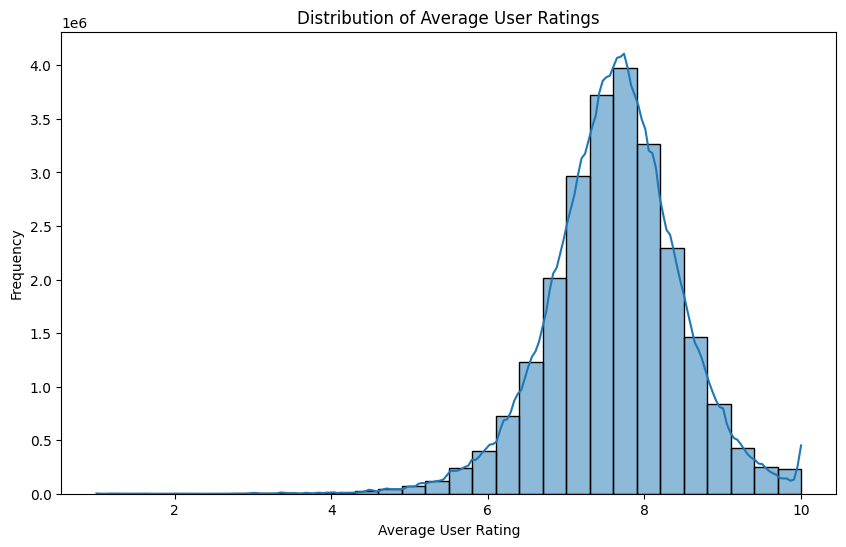

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.histplot(df['avg_user_rating'], bins=30, kde=True)
plt.title('Distribution of Average User Ratings')
plt.xlabel('Average User Rating')
plt.ylabel('Frequency')
plt.show()


Boxplot of Rating Deviation from User Average

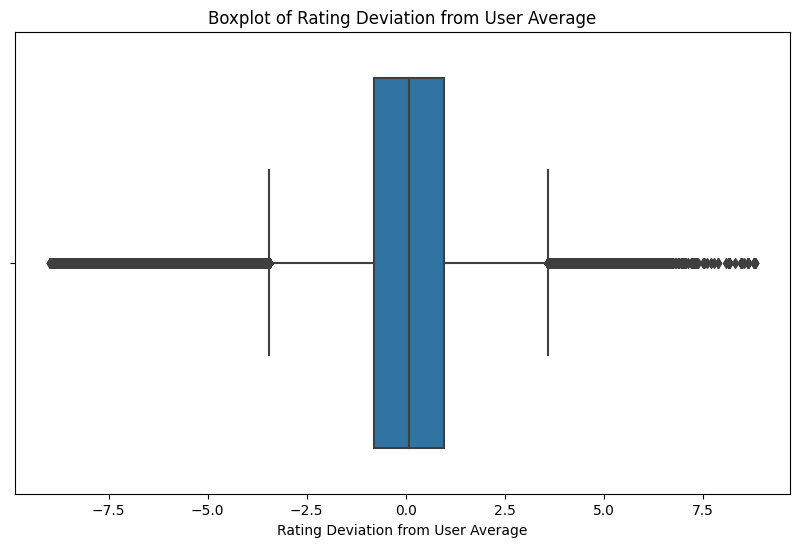

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='rating_deviation_user', data=df)
plt.title('Boxplot of Rating Deviation from User Average')
plt.xlabel('Rating Deviation from User Average')
plt.show()


 Scatter Plot of Number of Ratings per Anime vs. Average Anime Rating

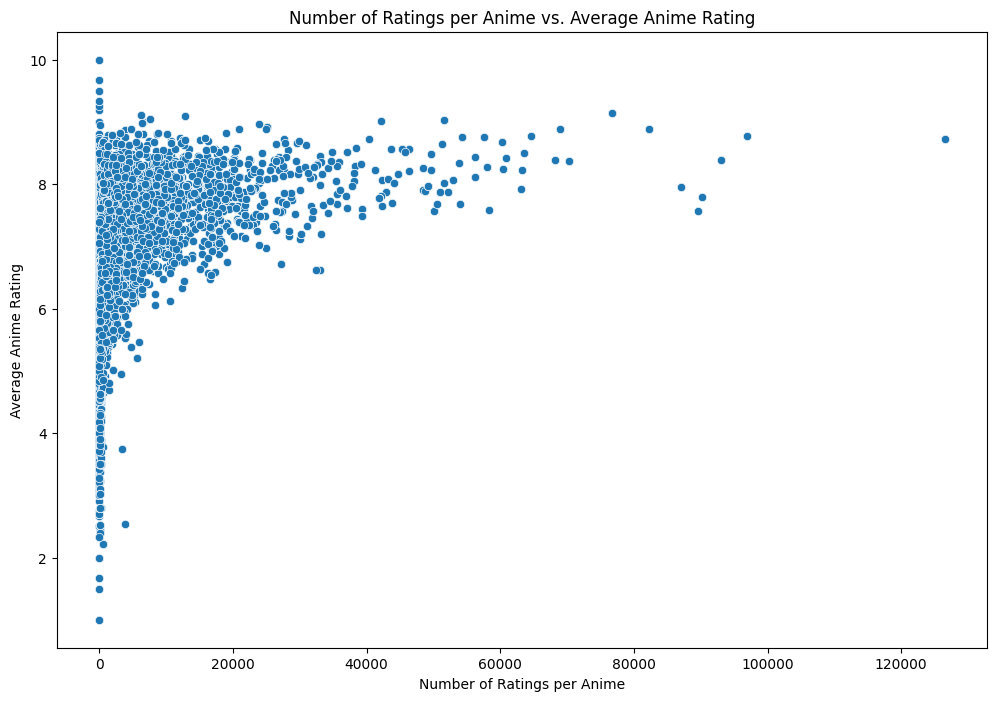

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='num_ratings_anime', y='avg_anime_rating', data=df)
plt.title('Number of Ratings per Anime vs. Average Anime Rating')
plt.xlabel('Number of Ratings per Anime')
plt.ylabel('Average Anime Rating')
plt.show()

Heatmap of Correlation Matrix

In [ ]:

correlation_matrix = df[['rating', 'avg_user_rating', 'avg_anime_rating', 'num_ratings_anime',
                         'rating_deviation_user', 'rating_deviation_anime']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix with New Features')
plt.show()


# Asking and Answering Questions



*   Ask at least 5 interesting questions about your dataset
*   Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
*  Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
*  Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does



1. What are the top-rated anime titles?





---





Answer: Compute the average rating for each anime title and display the top-rated ones.

In [ ]:
top_anime = df.groupby('Anime Title')['rating'].mean().sort_values(ascending=False).head(10)
print(top_anime)


Anime Title
Trick with Treat!! (with Undead)                  10.0
Teikou Penguin                                    10.0
Hakata Bus Terminal Blues                         10.0
Sore Ike! Anpanman: Yuurei Sen wo Yattsukero!!    10.0
Neko Naraba Ikeru                                 10.0
Hanabi (2022)                                     10.0
Deko Boko Friends                                 10.0
Sore Ike! Anpanman: Kirakira Boshi no Namida      10.0
Jungle Kurobee                                    10.0
Negative Shinkaron feat. Hatsune Miku             10.0
Name: rating, dtype: float64


2. How many unique users and anime titles are in the dataset?


---



Answer: Calculate the number of unique users and unique anime titles.

In [ ]:
unique_users = df['user_id'].nunique()
unique_anime_titles = df['Anime Title'].nunique()

print(f"Unique Users: {unique_users}")
print(f"Unique Anime Titles: {unique_anime_titles}")


Unique Users: 270033
Unique Anime Titles: 16611


3. What is the distribution of ratings given by users?


---



Answer: Visualize the distribution of ratings using a histogram.

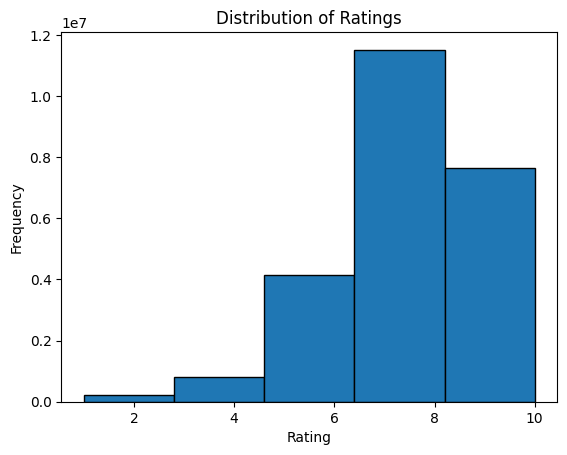

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['rating'], bins=5, edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


4. Who are the top users with the most rated anime?

---



Answer: Identify and display the users who have rated the most anime.

In [ ]:
top_users = df['user_id'].value_counts().head(10)
print(top_users)


6140      2986
97561     2890
65697     2885
2276      2868
520489    2863
114065    2847
6486      2804
470233    2794
317041    2790
405721    2782
Name: user_id, dtype: int64


5. How many users have rated the same anime title?

---



Answer: Find the distribution of the number of ratings given by users for each anime title.

In [ ]:
ratings_per_anime = df.groupby('Anime Title')['user_id'].count()
print(ratings_per_anime.describe())


count     16611.000000
mean       1464.402565
std        4992.716721
min           1.000000
25%           8.000000
50%          82.000000
75%         670.000000
max      126492.000000
Name: user_id, dtype: float64


6. What is the average rating given by each user?

---



 Answer: Calculate the average rating provided by each user.

In [ ]:
avg_rating_per_user = df.groupby('user_id')['rating'].mean()
print(avg_rating_per_user.head(10))


user_id
1     7.438931
4     6.524648
9     7.707692
20    8.057143
23    7.457447
37    8.066667
47    6.839161
48    6.280576
53    9.235294
66    7.530303
Name: rating, dtype: float64


7. Is there a correlation between the number of ratings an anime has and its average rating?

---



 Answer: Explore if popular anime titles tend to have higher or lower average ratings.

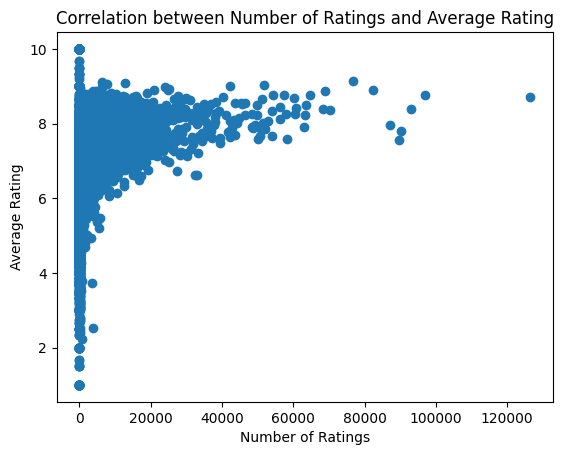

In [ ]:
anime_stats = df.groupby('Anime Title').agg({'user_id': 'count', 'rating': 'mean'})
plt.scatter(anime_stats['user_id'], anime_stats['rating'])
plt.title('Correlation between Number of Ratings and Average Rating')
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.show()

#Conclusion


---

# Conclusion of Pandas



# Advantages of Pandas:

1. Ease of Use: Pandas provides a user-friendly and intuitive interface, making it accessible for both beginners and experienced data scientists.

2. Data Structures: The DataFrame and Series data structures in pandas are well-suited for handling structured data, offering flexibility and efficiency in data manipulation.

3. Powerful Functionality: The library offers a rich set of functions for tasks such as data cleaning, grouping, merging, and statistical analysis, enabling users to perform complex operations with ease.

4. Integration with Other Libraries: Pandas seamlessly integrates with other popular Python libraries, such as NumPy, Matplotlib, and scikit-learn, enhancing its capabilities in data analysis and visualization.

5. Time Series Analysis: Pandas provides robust support for time series data, making it a valuable tool for applications in finance, economics, and various scientific domains.

# Disadvantages of Pandas:

1. Performance Issues with Large Datasets: While pandas is efficient for many tasks, it may face performance challenges when dealing with exceptionally large datasets, leading to increased memory usage and slower execution times.

2. Limited Support for Non-Tabular Data: Pandas is primarily designed for tabular, structured data, and may not be the most efficient choice for handling non-tabular data or unstructured data formats.

3. Learning Curve: Some users, particularly those new to programming or data analysis, may find the extensive functionality of pandas to have a steep learning curve.

# Considerations when Using Pandas:

1. Memory Usage: Users should be mindful of memory usage, especially when working with large datasets, and consider optimizations to enhance performance.

2. Documentation: Given the extensive functionality of pandas, consulting the documentation is essential to leverage the library to its full potential and troubleshoot issues.

3. Community and Support: Being an open-source project, pandas benefits from a vibrant community. Users should actively engage with the community forums and contribute to discussions for effective problem-solving.

4. Integration with Workflow: Users should consider how pandas integrates into their overall workflow, including compatibility with other tools and frameworks used in their projects.

# Summary

In summary, while pandas has some limitations, its advantages far outweigh its drawbacks, making it an indispensable tool for data analysis and manipulation in the Python ecosystem. Users can maximize the benefits of pandas by understanding its strengths, addressing potential challenges, and incorporating it judiciously into their data science workflows.